## Demo: Machine Learning Model Building Pipeline - Feature Engineering

In the following sessions, we will take you through a practical example of each one of the steps in the Machine Learning model building pipeline that we described in the first session. There will be a notebook for each one of the Machine Learning Pipeline steps:

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building

**This is the notebook for step 2: Feature Engineering**

We will use the house price dataset available on [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). See below for more details.

===================================================================================================

## Predicting Sale Price of Houses

The aim of the project is to build a machine learning model to predict the sale price of homes based on different explanatory variables describing aspects of residential houses. 

### Why is this important? 

Predicting house prices is useful to identify fruitful investments, or to determine whether the price advertised for a house is over or underestimated, before making a buying judgment.

### What is the objective of the machine learning model?

We aim to minimise the difference between the real price, and the estimated price by our model. We will evaluate model performance using the mean squared error (mse) and the root squared of the mean squared error (rmse).

### How do I download the dataset?

To download the House Price dataset go this website:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Scroll down to the bottom of the page, and click on the link 'train.csv', and then click the 'download' blue button towards the right of the screen, to download the dataset. Rename the file as 'houseprice.csv' and save it to a directory of your choice.

**Note the following:**
-  You need to be logged in to Kaggle in order to download the datasets.
-  You need to accept the terms and conditions of the competition to download the dataset
-  If you save the file to the same directory where you saved this jupyter notebook, then you can run the code as it is written here.

====================================================================================================

## Recap

In the previous session with analyzed the data at hand. So we are now familiar with the variables and their characteristics. We know that:

- Some by variables contain missing data.
- Some Numerical variables do not show a Gaussian distribution 
- We have categorical variables which we need to convert into numbers

## House Prices dataset: Feature Engineering

In the following cells, we will engineer / pre-process the variables of the House Price Dataset from Kaggle. We will engineer the variables so that we tackle:

1. Missing values
2. Temporal variables
3. Non-Gaussian distributed variables
4. Categorical variables: remove rare labels
5. Categorical variables: convert strings to numbers
5. Standarise the values of the variables to the same range*

\* Remember that the magnitude of the variables affect the performance of linear models, Support Vector
Machine (SVM) and Neural Networks among others.


### Setting the seed

It is important to note that we are engineering variables and pre-processing data with the idea of deploying the model if we find business value in it. Therefore, from now on, for each step that includes some element of randomness, it is extremely important that we **set the seed**. This way, we can obtain reproducibility between our research and our development code.

This is perhaps one of the most important lessons that you need to take away from this course: **Always set the seeds**.

> We need the warranty reproducibility between our research environment and our production environment. So the models that we built during our research project need to be exactly the same that the models that we build in our production environments. 
>
> **What do I mean by this by models being exactly the same?** Well what I mean is that given the same data entered in the model the same output needs to come out, exactly the same output. 
>
> **So, why is the seed important?** Well because many of the machine learning algorithms that we use utilize elements of randomness during training. So to control these randomness and to make our models reproducible across the environments we need to set the seed.


Let's go ahead and load the dataset.

In [4]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# to set the style of the plots
plt.style.use('ggplot')

In [5]:
# load dataset
data = pd.read_csv('../data/houseprice-train.csv')
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Separate dataset into train and test

Before beginning to engineer our features, it is important to separate our data intro training and testing set. This is to avoid over-fitting. This step involves randomness, therefore, we need to set the seed.

In [7]:
# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)

X_train, X_test, y_train, y_test = train_test_split(data, data.SalePrice,
                                                    test_size=0.1,
                                                    random_state=0) # we are setting the seed here
X_train.shape, X_test.shape

((1314, 81), (146, 81))

> #### Setting the seed 
>
>This is a very important step in any data science project. Because creating a train and set ses  has an element of randomness we need to set the seed. 
>
>The way to set the seed using this [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function from [scikit-learn](https://scikit-learn.org/stable/) is by passing a value to the `random_state` any value. Just make sure it is the same value in the research and in the production environments.


> #### Definitions
>
>- **Training Dataset**: The sample of data used to fit the model.
>- **Validation Dataset**: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.
>- **Test Dataset**: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.
>
> Notice that the “validation dataset” disappears if the practitioner is choosing to tune model hyperparameters using k-fold cross-validation with the training dataset.
>
> Take a look to the following: [What is the Difference Between Test and Validation Datasets?](https://machinelearningmastery.com/difference-test-validation-datasets/)

### Missing values

#### Missing values for the categorical variables

For categorical variables, we will fill missing information by adding an additional category: "missing"

In [8]:
# make a list of the categorical variables that contain missing values
vars_with_na = [var for var in data.columns if X_train[var].isnull().sum()>1 and X_train[var].dtypes=='O']

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(X_train[var].isnull().mean(), 3),  ' % missing values')

Alley 0.938  % missing values
MasVnrType 0.005  % missing values
BsmtQual 0.024  % missing values
BsmtCond 0.024  % missing values
BsmtExposure 0.025  % missing values
BsmtFinType1 0.024  % missing values
BsmtFinType2 0.025  % missing values
FireplaceQu 0.473  % missing values
GarageType 0.056  % missing values
GarageFinish 0.056  % missing values
GarageQual 0.056  % missing values
GarageCond 0.056  % missing values
PoolQC 0.995  % missing values
Fence 0.814  % missing values
MiscFeature 0.961  % missing values


The typical way of handling missing values in **categorical** variables is by adding a new category with the label missing. So now wherever data was missing there will be a new label called `missing` in that variable.

This is exactly what this function here is doing. The `.fillna()` functions is a very common Pandas function. You're probably familiar with it.

In [9]:
# function to replace NA in categorical variables
def fill_categorical_na(df, var_list):
    X = df.copy()
    X[var_list] = df[var_list].fillna('Missing')
    return X

And then in the next cell I go ahead and fill the missing values both in the train and in the test sets. Then I print out the percentage of missing values in the train set to check that the function works.

In [10]:
# replace missing values with new label: "Missing"
X_train = fill_categorical_na(X_train, vars_with_na)
X_test = fill_categorical_na(X_test, vars_with_na)

# check that we have no missing information in the engineered variables
X_train[vars_with_na].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [11]:
# check that test set does not contain null values in the engineered variables
[vr for var in vars_with_na if X_train[var].isnull().sum()>0]

[]

#### Missing values in the numerical varaibles

Next I will fill the missing values in the numerical variables. 

First I capture the numerical variables that contain missing values in this list comprehension `vars_with_na`. We have three of them.

In [13]:
# make a list of the numerical variables that contain missing values
vars_with_na = [var for var in data.columns if X_train[var].isnull().sum()>1 and X_train[var].dtypes!='O']

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(X_train[var].isnull().mean(), 3),  ' % missing values')

LotFrontage 0.177  % missing values
MasVnrArea 0.005  % missing values
GarageYrBlt 0.056  % missing values


And then I'm going to do two things that are commonly done in data science projects.

- First I will add a **binary variable** `var+_na` indicating if there were missing information. These new binary variable will have a number `1` if the observations show the missing value or the number `0` if the observations show the real value.
- And after that I replace in the original value over the missing information with the mode.

> Note that the mode is captured only utilizing information from the **training set** and then I use these value `mode_val`, the mode as we calculated in the training set, to replace the missing information in both the **train set** and the **test set**. This is common practice in data science. Also we will continue to use this mode value in the deployed model as well.

Finally, I check that the missing values have been replaced and we have now no more missing information in the regional variables:

In [14]:
# replace the missing values
for var in vars_with_na:
    
    # calculate the mode
    mode_val = X_train[var].mode()[0]
    
    # train
    X_train[var+'_na'] = np.where(X_train[var].isnull(), 1, 0)
    X_train[var].fillna(mode_val, inplace=True)
    
    # test
    X_test[var+'_na'] = np.where(X_test[var].isnull(), 1, 0)
    X_test[var].fillna(mode_val, inplace=True)

# check that we have no more missing values in the engineered variables
X_train[vars_with_na].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

And here I show you how the new binary variables should look like:

In [16]:
# check that we have the added binary variables that capture missing information
X_train[['LotFrontage_na', 'MasVnrArea_na', 'GarageYrBlt_na']].head()

,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
930,0,0,0
656,0,0,0
45,0,0,0
1348,1,0,0
55,0,0,0


In [17]:
# check that test set does not contain null values in the engineered variables
[vr for var in vars_with_na if X_test[var].isnull().sum()>0]

[]

### Temporal variables

We remember from the previous session, that there are 4 variables that refer to the years in which something was built or something specific happened. We will capture the time elapsed between the that variable and the year the house was sold `YrSold`.

This is what the `elapsed_years(df, var)` function here is doing: 
- I capture the elapsed time between the three temporal variables that we discovered in our previous lecture and the year in which the house was sold.


In [19]:
# let's explore the relationship between the year variables and the house price in a bit of more details

def elapsed_years(df, var):
    # capture difference between year variable and year the house was sold
    df[var] = df['YrSold'] - df[var]
    return df

In [21]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)

In [22]:
# check that test set does not contain null values in the engineered variables
[vr for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'] if X_test[var].isnull().sum()>0]

[]

### Numerical variables

In the previous session, we applied the log transformation to the non-zero and positive variables to improve the spread of values and obtain a gaussian shape. So, this is what I going to do in the following loop.

We will log transform the numerical variables that do not contain zeros in order to get a more Gaussian-like distribution. This tends to help Linear machine learning models. 

>I will lock transform all the variables in the following list. This list comes from the research we did in the previous session. Note that I transform as well the **target** which is the sale price, `SalePrice`. The target also shows a skewed distribution too. That's becuase we can log tranform the target too.

In [24]:
for var in ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']:
    X_train[var] = np.log(X_train[var])
    X_test[var]= np.log(X_test[var])

In [26]:
# check that test set does not contain null values in the engineered variables
[var for var in ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice'] if X_test[var].isnull().sum()>0]

[]

In [27]:
# same for train set
[var for var in ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice'] if X_train[var].isnull().sum()>0]

[]

### Categorical variables

When working with categorical variables. There were two things that we needed to do.

- The first one was to handle the **infrequent labels** 
- and the second one was to **convert the strings into numbers**

#### Handle the infrequent labels

First, we will remove those categories within variables that are present in less than 1% of the observations:

In [28]:
# let's capture the categorical variables first
cat_vars = [var for var in X_train.columns if X_train[var].dtype == 'O']

So in order to capture the infrequent labels first, what we're going to group all the labels within a variable, that are present in less than 1% of the observations, into one umbrella category called `rare`.

The first function `find_frequent_labels()` captures in a list the categories that are shown by more than one percent of the observations in the dataset.

The second loop checks, variable per variable, if the category is present in the frequent category list and then it keeps it, if it is not, it replaces by a new category that is called rare.

> This way if a new future data a label that was not present in the train set comes through to the model, the pipeline will know what to do with it. It will put it within the umbrella category called `Rare` and now the train model will know how to handle it because `Rare` was present in the transit.

In [29]:
def find_frequent_labels(df, var, rare_perc):
    # finds the labels that are shared by more than a certain % of the houses in the dataset
    df = df.copy()
    tmp = df.groupby(var)['SalePrice'].count() / len(df)
    return tmp[tmp>rare_perc].index

for var in cat_vars:
    frequent_ls = find_frequent_labels(X_train, var, 0.01)
    X_train[var] = np.where(X_train[var].isin(frequent_ls), X_train[var], 'Rare')
    X_test[var] = np.where(X_test[var].isin(frequent_ls), X_test[var], 'Rare')

#### Convert the strings into numbers

Next, we need to transform the strings of these variables into numbers. So, we can build models using scikit-learn. We will do it so that we capture the monotonic relationship between the label and the target:

> How am I going to replace the strings? Simple. I will replace each string by a digit. But these digits will be ordered following the mean of the target for that string. So labels where the mean of the house price is the lowest will be replaced by digit `1` and labels where the mean of the house price is the biggest will be replaced by a bigger digit.

In [30]:
# this function will assign discrete values to the strings of the variables, 
# so that the smaller value corresponds to the smaller mean of target

def replace_categories(train, test, var, target):
    ordered_labels = train.groupby([var])[target].mean().sort_values().index
    ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
    train[var] = train[var].map(ordinal_label)
    test[var] = test[var].map(ordinal_label)

In [31]:
for var in cat_vars:
    replace_categories(X_train, X_test, var, 'SalePrice')

In [32]:
# check absence of na
[var for var in X_train.columns if X_train[var].isnull().sum()>0]

[]

In [33]:
# check absence of na
[var for var in X_test.columns if X_test[var].isnull().sum()>0]

[]

Here I recreate the function that we used in our previous session for exmploratory analysis. So this function takes a data frame on the variable of interest, then it groups the data by the value of the variable, in this case by the category, that by now it should be number instead of a string, and then it plots the median house price per category.

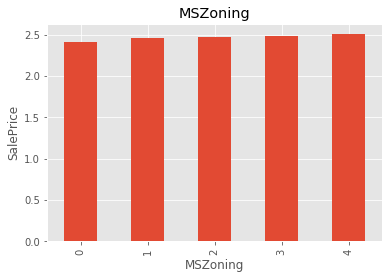

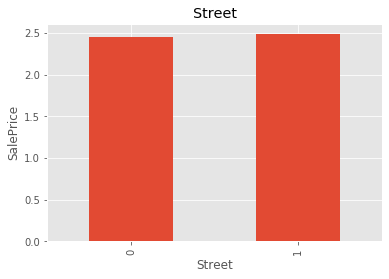

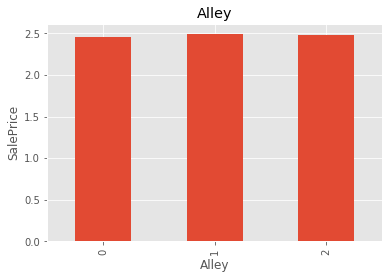

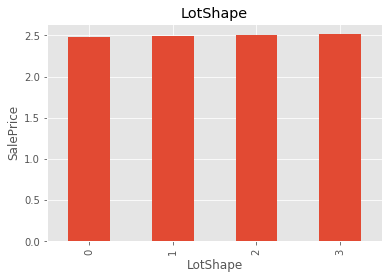

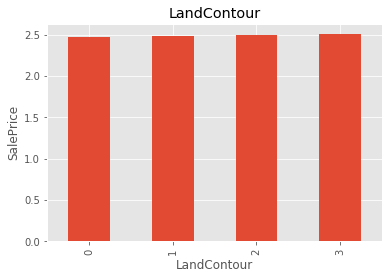

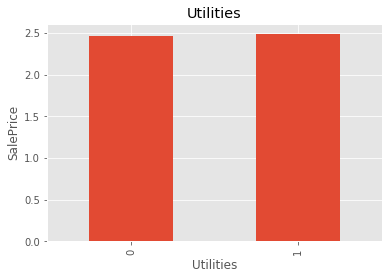

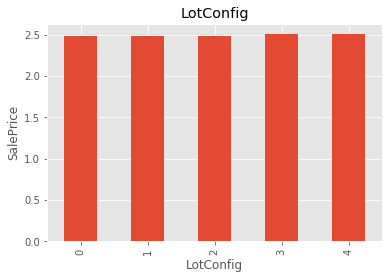

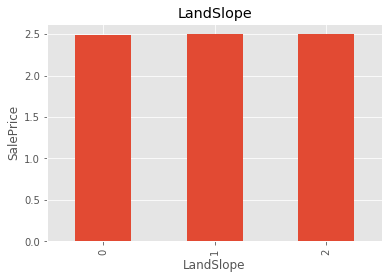

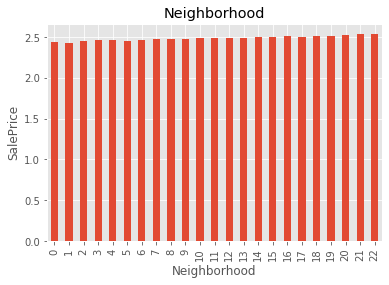

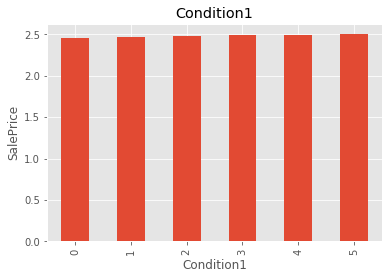

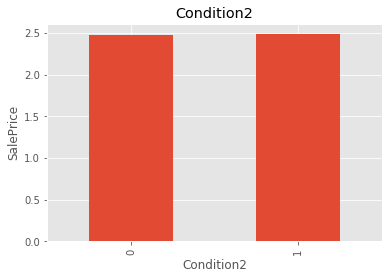

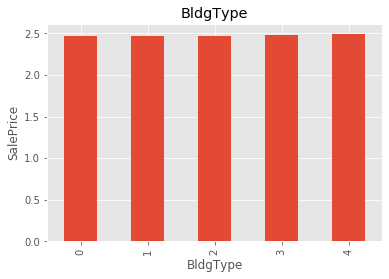

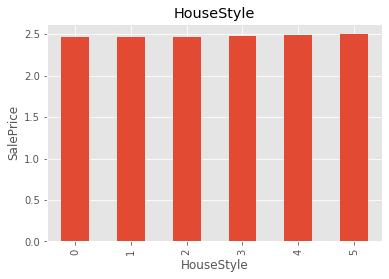

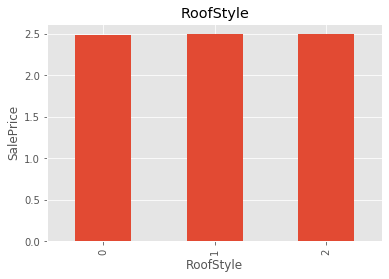

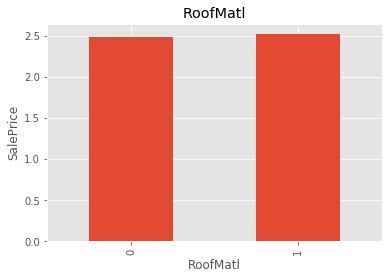

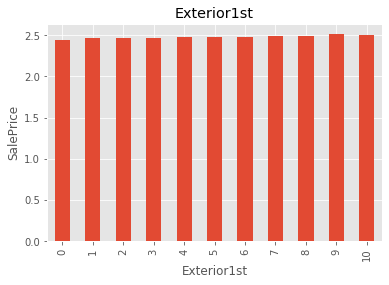

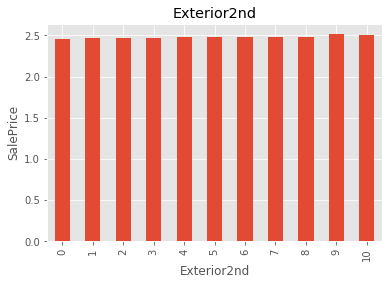

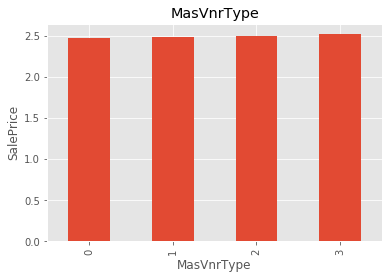

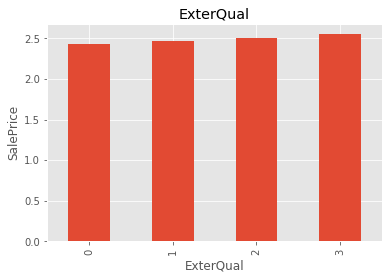

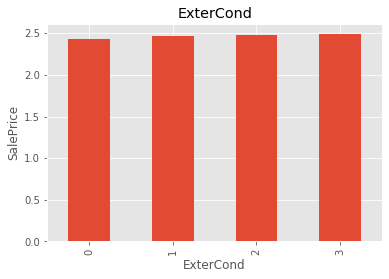

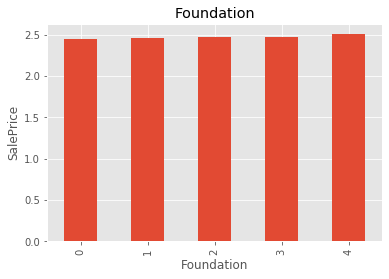

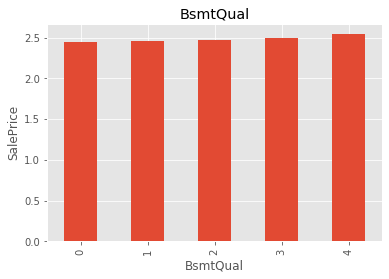

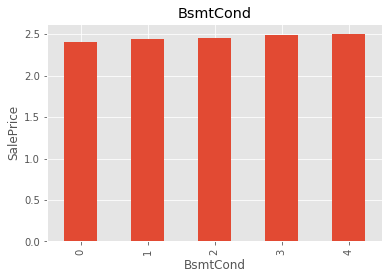

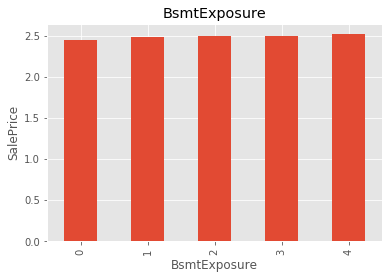

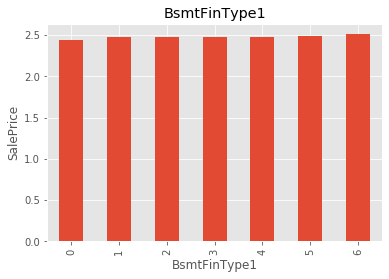

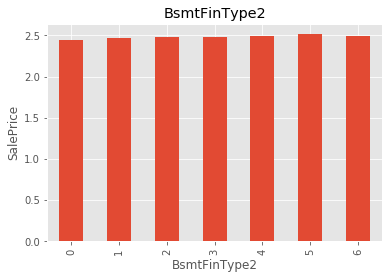

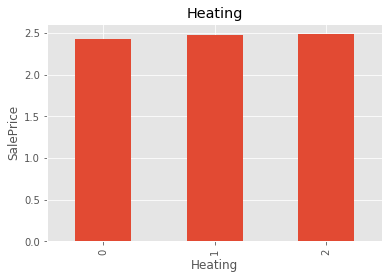

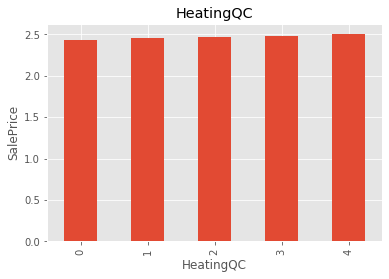

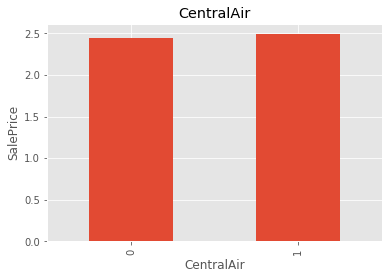

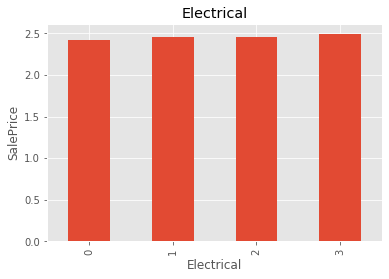

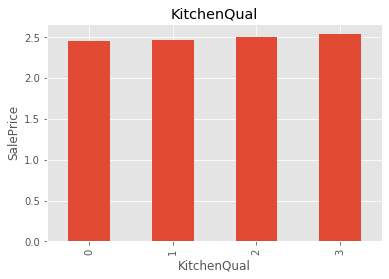

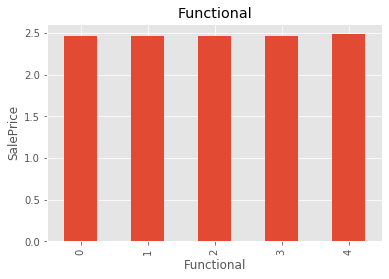

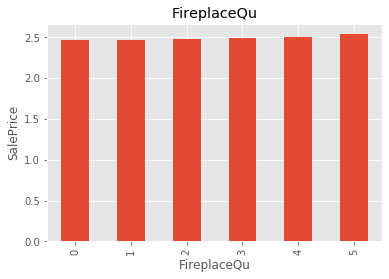

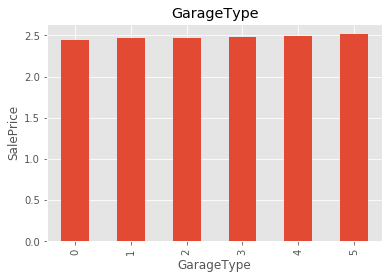

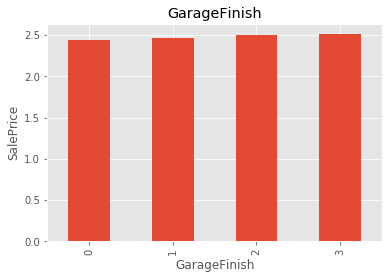

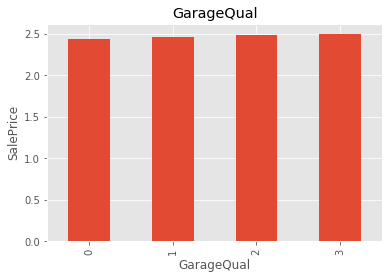

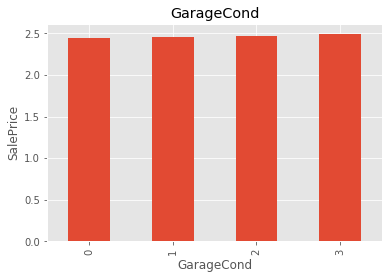

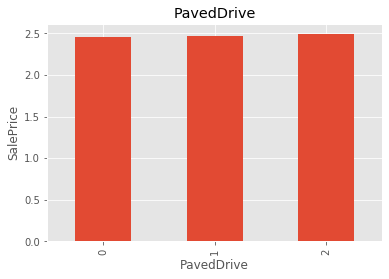

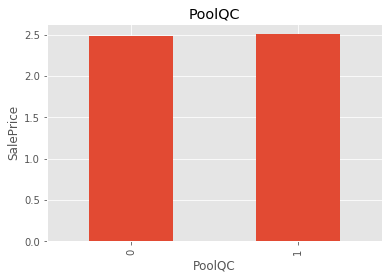

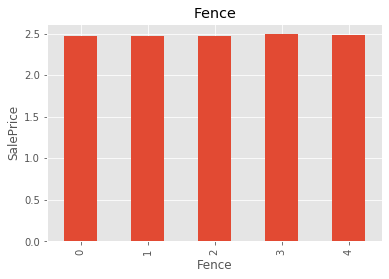

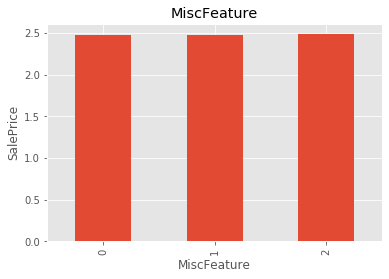

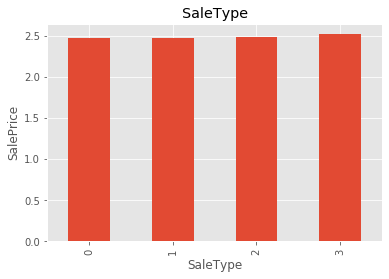

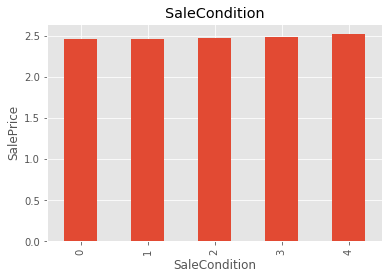

In [34]:
# let me show you what I mean by monotonic relationship between labels and target
def analyse_vars(df, var):
    df = df.copy()
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('SalePrice')
    plt.show()
    
for var in cat_vars:
    analyse_vars(X_train, var)

We can now see monotonic relationships between the labels of our variables and the target (remember that the target is log-transformed, that is why the differences seem so small).

### Feature Scaling

The final step is to make sure that all the features all the variables within our data set are within the same scale.

For use in linear models and neural networks, features need to be either scaled or normalised. In the next section, I will scale features between the min and max values:

In [35]:
train_vars = [var for var in X_train.columns if var not in ['Id', 'SalePrice']]
len(train_vars)

97

In [36]:
X_train[['Id', 'SalePrice']].reset_index(drop=True)

,Id,SalePrice
0,931,2.502342
1,657,2.475524
2,46,2.539692
3,1349,2.507841
4,56,2.493494
5,1229,2.550532
6,964,2.516423
7,922,2.475755
8,459,2.484003
9,1387,2.520050


We can use the [MinMaxScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) from scikit-learn. The `MinMaxScaler()` will make sure that all the values of the variables are squeezed between 0 and 1.

- As every other object from scikit-learn, we first call the object (crete an instance) in order to use it. 
- And then we fit the object we fit the scalar using the training set. So that the `MinMaxScaler()` learns the parameters that it needs to use to scale the data.
- And then, we can go ahead and scale both the train and the test datasets. 

Finally, here `['Id', 'SalePrice']` I use a wrapper to make sure that the `id` and the target are added to the final dataset. Remember that the `id` and the target should not be scaled.

In [38]:
# fit scaler
scaler = MinMaxScaler() # create an instance
scaler.fit(X_train[train_vars]) #  fit  the scaler to the train set for later use

# transform the train and test set, and add on the Id and SalePrice variables
X_train = pd.concat([X_train[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_train[train_vars]), columns=train_vars)],
                    axis=1)

X_test = pd.concat([X_test[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_test[train_vars]), columns=train_vars)],
                    axis=1)

In [39]:
X_train.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Alley_na,MasVnrType_na,BsmtQual_na,BsmtCond_na,BsmtExposure_na,BsmtFinType1_na,BsmtFinType2_na,FireplaceQu_na,GarageType_na,GarageFinish_na,GarageQual_na,GarageCond_na,PoolQC_na,Fence_na,MiscFeature_na,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,931,2.502342,0.000000,0.75,0.540070,0.442332,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.978261,0.950000,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,0.75,1.000000,0.002835,0.666667,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.605006,0.0,0.0,0.572075,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.2,0.8,0.972727,1.000000,0.75,0.430183,0.666667,1.0,1.0,0.116686,0.032907,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.75,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,657,2.475524,0.000000,0.75,0.535000,0.465567,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.630435,0.933333,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,1.0,0.5,0.50,0.75,0.25,0.666667,0.142807,0.666667,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.481078,0.0,0.0,0.454892,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.2,0.8,0.536364,0.666667,0.25,0.220028,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.50,1.0,0.0,0.636364,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,46,2.539692,0.588235,0.75,0.472755,0.410782,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.963768,0.916667,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,1.0,1.0,1.00,0.75,0.25,1.000000,0.080794,0.666667,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.669444,0.0,0.0,0.633005,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.8,0.954545,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.228705,0.149909,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.090909,1.00,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1349,2.507841,0.000000,0.75,0.466412,0.560271,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.913043,0.800000,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,1.00,1.000000,0.255670,0.666667,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.611921,0.0,0.0,0.578613,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.8,0.890909,0.666667,0.50,0.362482,0.666667,1.0,1.0,0.469078,0.045704,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.25,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,56,2.493494,0.000000,0.75,0.651509,0.468924,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.666667,0.233333,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,1.0,0.5,0.50,0.75,0.25,0.333333,0.086818,0.666667,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.594605,0.0,0.0,0.562240,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.8,0.581818,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.801181,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

That concludes the feature engineering section for this dataset.

In [40]:
# check absence of missing values
X_train.isnull().sum()

Id                 0
SalePrice          0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
                  ..
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
PoolQC             0
Fence              0
MiscFeature        0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Alley_na           0
MasVnrType_na      0
BsmtQual_na        0
BsmtCond_na        0
BsmtExposure_

In [41]:
# let's now save the train and test sets for the next notebook!

X_train.to_csv('../data/xtrain-houseprice.csv', index=False)
X_test.to_csv('../data/xtest-houseprice.csv', index=False)